In [2]:
import requests
import numpy as np
import pandas as pd
import csv

# For Individual Feature Extraction 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from collections import Counter

# For Relational Feature Extraction
from statistics import mean
import math

# For feature analyzation
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell

# increase size of output window
from IPython.core.display import display, HTML

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

# For machine learning
from sklearn import svm
from sklearn.svm import SVC

# Modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Saving
import joblib
from joblib import dump, load

from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

header = ['Unnamed: 0', 'Statement', 'Label','function','pronoun','ppron','i','we','you','shehe','they','ipron','article','prep',
          'auxverb','adverb','conj','negate','verb','adj','compare','interrog','number','quant','affect',
          'posemo','negemo','anx','anger','sad','social','family','friend','female','male','cogproc',
          'insight','cause','discrep','tentat','certain','differ','percept','see','hear','feel','bio',
          'body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
          'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure',
          'home','money','relig','death','informal','swear','netspeak','assent','nonflu','filler']

train = pd.read_csv('test_feature.csv', delimiter = ',', names = header,  encoding = 'utf-8-sig')
train = train.drop(0)
test = pd.read_csv('test_feature.csv', delimiter = ',', names = header,  encoding = 'utf-8-sig')
test = test.drop(0)
valid = pd.read_csv('valid_feature.csv', delimiter = ',', names = header,  encoding = 'utf-8-sig')
valid = valid.drop(0)

k=15
cols = [col for col in train.columns if col not in ['Unnamed: 0', 'Label', 'Statement']]


In [ ]:
Univariate Selection

In [3]:
X = train[cols]
Y = test.Label

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))
features = pd.DataFrame(featureScores.nlargest(15,'Score'))
features_list = features.Features.tolist()


new_cols = [col for col in train.columns if col in [features_list[0],features_list[1],features_list[2],features_list[3],
                                                    features_list[4],features_list[5],features_list[6],features_list[7],
                                                    features_list[8],features_list[9],features_list[10],features_list[11],
                                                    features_list[12],features_list[13],features_list[14]]]

       Features      Score
57      relativ  31.934933
0      function  26.743302
59        space  26.014542
17      compare  19.147504
16          adj  16.465593
10         prep  15.824252
60         time  12.215824
23       negemo   7.916506
56  focusfuture   6.640509
38       differ   6.615643
43          bio   5.798314
9       article   5.716533
53         risk   5.705253
12       adverb   5.604963
20        quant   5.463315


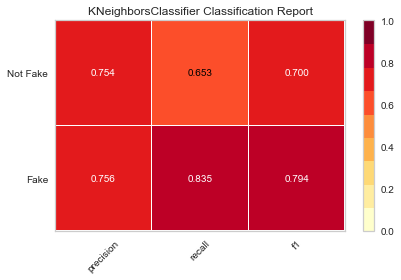

KNeighbors Accuracy:  0.755327545382794


In [4]:

X_train = train[new_cols]
Y_train = train['Label']

X_test = test[new_cols]
Y_test = test['Label']

X_valid = valid[new_cols]
Y_valid = valid['Label']

#Predict on test.csv
kn = KNeighborsClassifier(n_neighbors = 3)
pred_kn = kn.fit(X_train, Y_train).predict(X_test)

KN_test = ClassificationReport(kn, classes=['Fake', 'Not Fake'])
KN_test.fit(X_train, Y_train)
KN_test.score(X_test, Y_test)
KN_test.show()

print("KNeighbors Accuracy: ", accuracy_score(Y_test, pred_kn))
#print("KNeighbors F1-Score: ", f1_score(Y_test, pred_kn))

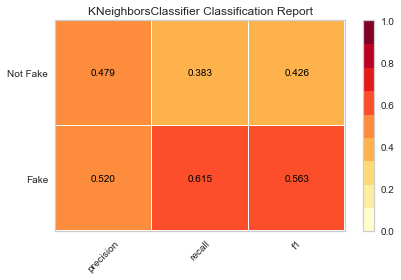

KNeighbors Accuracy:  0.5038940809968847


In [5]:
#Predict on valid.csv
pred_kn = kn.fit(X_train, Y_train).predict(X_valid)
KN_valid = ClassificationReport(kn, classes = ['Fake', 'Not Fake'])
KN_valid.fit(X_train, Y_train)
KN_valid.score(X_valid, Y_valid)
KN_valid.show()

print("KNeighbors Accuracy: ", accuracy_score(Y_valid, pred_kn))
#print("KNeighbors F1-Score: ", f1_score(Y_valid, pred_kn))

In [ ]:
Feature Importance

C:\Users\chenj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04389759 0.02449347 0.0135897  0.00416358 0.00766124 0.00582508
 0.00835821 0.00592264 0.01849879 0.03968824 0.03798971 0.02841096
 0.02100935 0.02975775 0.01956267 0.03132959 0.02263953 0.01986756
 0.01489631 0.01237864 0.02320725 0.01541965 0.01257756 0.00650917
 0.00107205 0.00181779 0.00651439 0.02469607 0.0021491  0.00041098
 0.00477931 0.00842978 0.02726865 0.00877891 0.01445247 0.01187123
 0.01151784 0.01427014 0.0216467  0.00809832 0.00569908 0.00700365
 0.00221348 0.00929471 0.00347426 0.00651654 0.00121275 0.00240426
 0.02454776 0.00869781 0.01367276 0.02067663 0.01337397 0.00452508
 0.02787924 0.03613245 0.01361264 0.03788788 0.01968225 0.03066952
 0.02123647 0.01633055 0.00359875 0.00614455 0.02034786 0.
 0.00386654 0.002567   0.         0.00093556 0.         0.00036802
 0.        ]


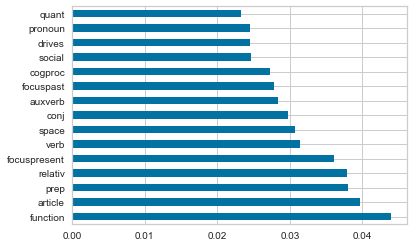

In [4]:
X = train[cols]
y = test.Label
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
features.to_csv('selected_features.csv')
features = pd.read_csv('selected_features.csv',delimiter = ',', names = ['Features','Importances'],encoding = 'utf-8-sig')
features_list = features.Features.tolist()

new_cols = [col for col in train.columns if col in [features_list[0],features_list[1],features_list[2],features_list[3],
                                                    features_list[4],features_list[5],features_list[6],features_list[7],
                                                    features_list[8],features_list[9],features_list[10],features_list[11],
                                                    features_list[12],features_list[13],features_list[14]]]


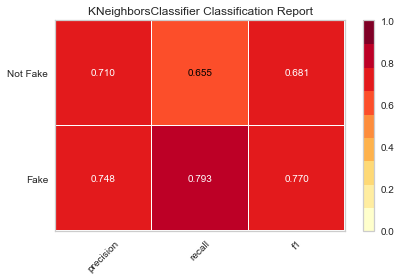

KNeighbors Accuracy:  0.7324388318863457


In [5]:
X_train = train[new_cols]
Y_train = train['Label']

X_test = test[new_cols]
Y_test = test['Label']

X_valid = valid[new_cols]
Y_valid = valid['Label']

#Predict on test.csv
kn = KNeighborsClassifier(n_neighbors = 3)
pred_kn = kn.fit(X_train, Y_train).predict(X_test)

KN_test = ClassificationReport(kn, classes=['Fake', 'Not Fake'])
KN_test.fit(X_train, Y_train)
KN_test.score(X_test, Y_test)
KN_test.show()

print("KNeighbors Accuracy: ", accuracy_score(Y_test, pred_kn))
#print("KNeighbors F1-Score: ", f1_score(Y_test, pred_kn))

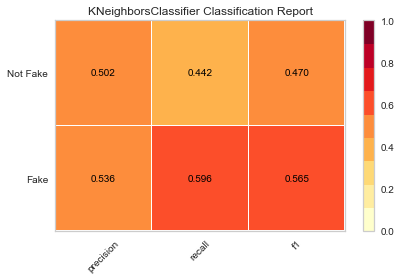

KNeighbors Accuracy:  0.5218068535825545


In [10]:
#Predict on valid.csv
pred_kn = kn.fit(X_train, Y_train).predict(X_valid)
KN_valid = ClassificationReport(kn, classes = ['Fake', 'Not Fake'])
KN_valid.fit(X_train, Y_train)
KN_valid.score(X_valid, Y_valid)
KN_valid.show()

print("KNeighbors Accuracy: ", accuracy_score(Y_valid, pred_kn))
#print("KNeighbors F1-Score: ", f1_score(Y_test, pred_kn))